In [37]:
# Road Traffic Accidents Analysis - Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# ---------------------------
# 🛠️ DATA LOADING & PREPROCESSING
# ---------------------------

df = pd.read_csv("road-traffic-accidents.csv")

# Handle missing data
df = df.fillna("No Data")
df = df.applymap(lambda x: "No Data" if isinstance(x, str) and x.strip() == '' else x)

# Convert 'Number_of_Casualties' to integer
df['Number_of_Casualties'] = pd.to_numeric(df['Number_of_Casualties'], errors='coerce').fillna(0).astype(int)

# Group darkness conditions
df['Light_Grouped'] = df['Light_Conditions'].apply(
    lambda x: 'Dark' if isinstance(x, str) and x.strip().lower().startswith('darkness') else x
)

# Extract DateTime info
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df = df[df['Accident Date'].notna()]
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month

C:\Users\ayush\AppData\Local\Temp\ipykernel_12872\1996987296.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: "No Data" if isinstance(x, str) and x.strip() == '' else x)


In [39]:
# ---------------------------
# 🎯 OBJECTIVE 1: Casualties by Severity
# ---------------------------
# Insight: Helps understand how fatal or serious most accidents are.
# Expectation: 'Slight' severity may dominate as minor accidents are more frequent.

# ---------------------------
# 🎯 OBJECTIVE 2: Light Conditions Distribution
# ---------------------------
# Insight: Measures how lighting affects accident occurrence.
# Expectation: Daylight may dominate in numbers, but nighttime might be deadlier.

# ---------------------------
# 🎯 OBJECTIVE 3: Accident Severity vs. Weather Conditions
# ---------------------------
# Insight: Helps identify if adverse weather conditions (e.g., rain, snow, fog) lead to more severe accidents.
# Expectation: Severe weather conditions may lead to higher numbers of serious and fatal accidents compared to slight accidents.

# ---------------------------
# 🎯 OBJECTIVE 4: Casualties by Road Type
# ---------------------------
# Insight: Reveals if urban roads or highways are more prone to accidents.
# Expectation: Single carriageways or high-speed roads may show more casualties.

# ---------------------------
# 🎯 OBJECTIVE 5: Casualties by Vehicle Type (Top 10)
# ---------------------------
# Insight: Indicates which vehicle types are involved in the most casualties.
# Expectation: Cars, motorcycles, and vans may top the list.

# ---------------------------
# 🎯 OBJECTIVE 6: Monthly Casualties (2021 vs 2022)
# ---------------------------
# Insight: Highlights seasonal accident trends.
# Expectation: Spikes may occur in rainy months or holiday seasons.

# ---------------------------
# 🎯 OBJECTIVE 7: Urban vs Rural Accidents
# ---------------------------
# Insight: Compares accident impact in city areas vs countryside.
# Expectation: Rural may have deadlier accidents due to higher speeds, but urban may have more frequent incidents.



In [40]:
# ---------------------------
# 📈 VISUALIZATIONS
# ---------------------------

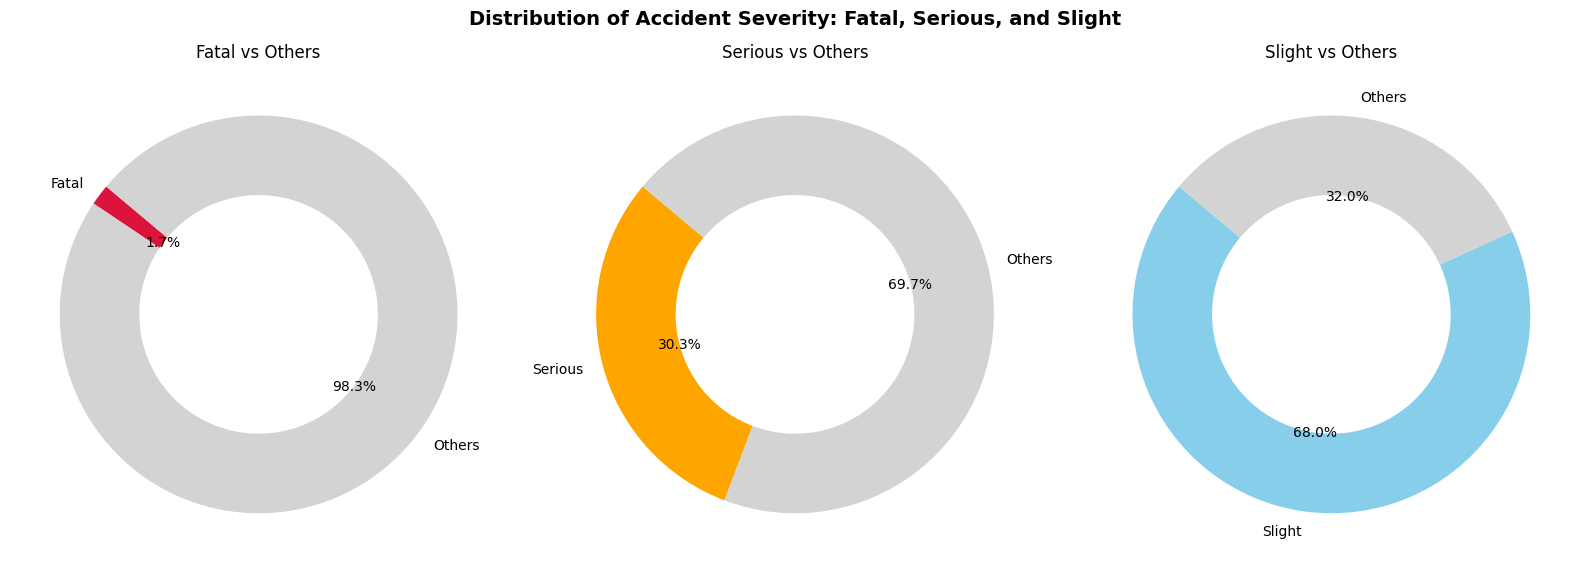

In [41]:

# 1. ACCIDENT SEVERITY ANALYSIS

# Casualty data
fatal = 7105
serious = 126760
slight = 283918
total = fatal + serious + slight


labels = ['Category', 'Others']
colors = [['crimson', 'lightgrey'], ['orange', 'lightgrey'], ['skyblue', 'lightgrey']]
sizes = [
    [fatal, total - fatal],
    [serious, total - serious],
    [slight, total - slight]
]
titles = ['Fatal vs Others', 'Serious vs Others', 'Slight vs Others']

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(16, 6)) 

for i in range(3):
    wedges, texts, autotexts = axes[i].pie(
        sizes[i],
        labels=[titles[i].split()[0], 'Others'],
        colors=colors[i],
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops=dict(width=0.4)
    )
    axes[i].set_title(titles[i])
    for text in texts + autotexts:
        text.set_fontsize(10)

plt.suptitle('Distribution of Accident Severity: Fatal, Serious, and Slight', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



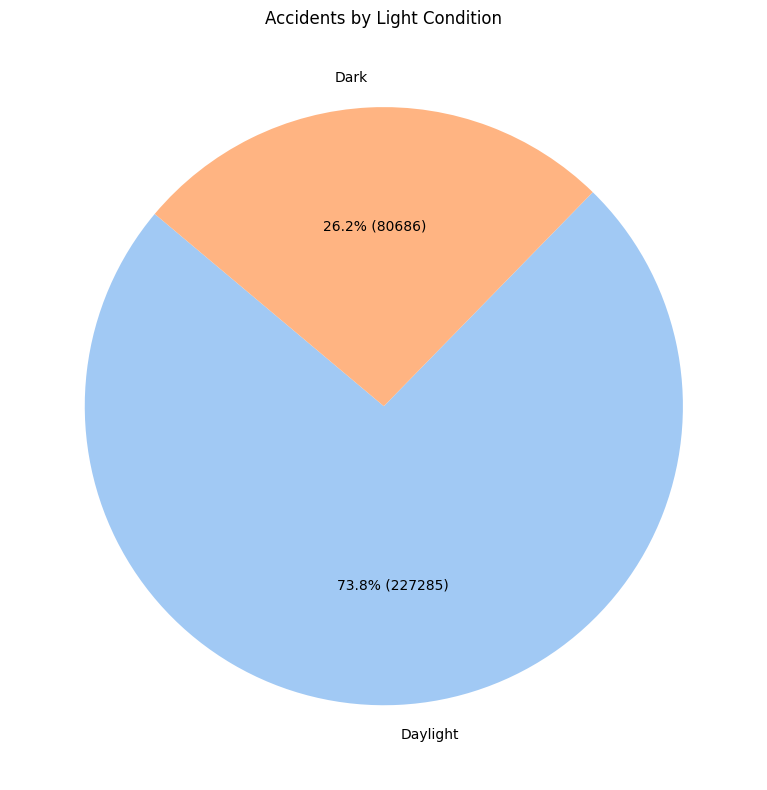

In [42]:


# 2. Accidents by Light Condition

plt.figure(figsize=(8, 8))  
light_grouped_counts = df['Light_Grouped'].value_counts()
plt.pie(
    light_grouped_counts,
    labels=light_grouped_counts.index,
    autopct=lambda p: f'{p:.1f}% ({int(p/100.*light_grouped_counts.sum())})',
    startangle=140,
    colors=sns.color_palette("pastel")
)

plt.title('Accidents by Light Condition')
plt.tight_layout()
plt.show()



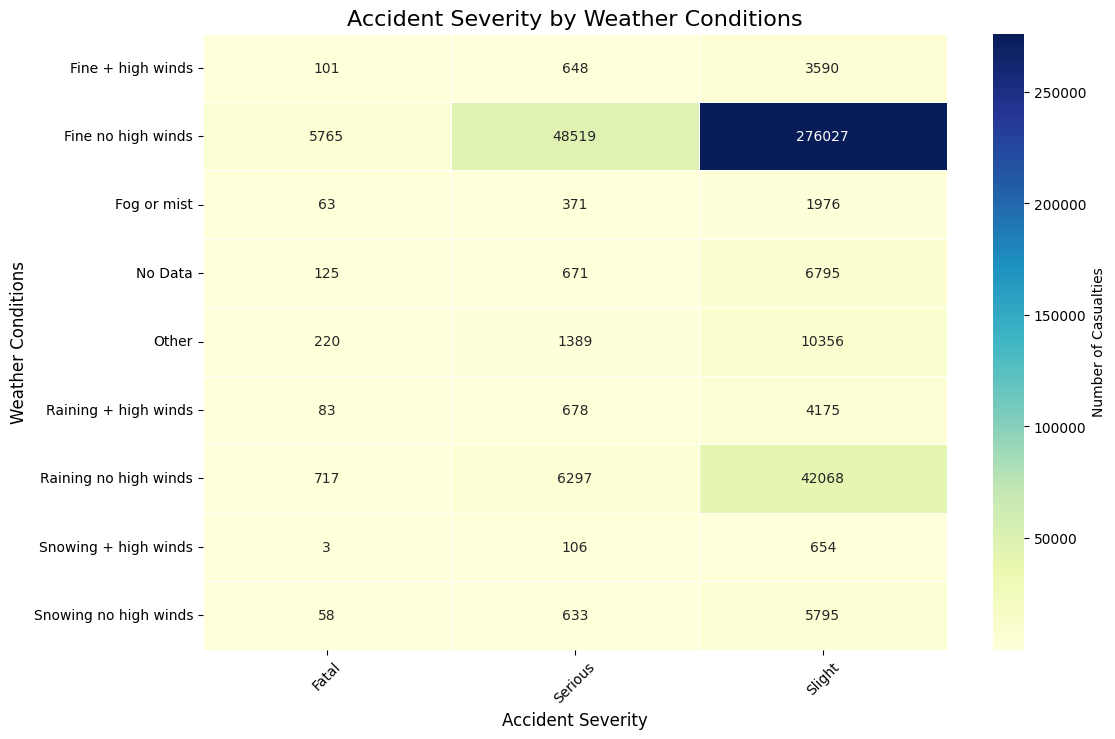

In [43]:

# 3. Accident Severity vs. Weather Conditions

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# severity_weather = df.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack(fill_value=0)

weather_severity_matrix = df.pivot_table(index='Weather_Conditions', 
                                         columns='Accident_Severity', 
                                         values='Number_of_Casualties', 
                                         aggfunc='sum')


plt.figure(figsize=(12, 8))
sns.heatmap(weather_severity_matrix, annot=True, cmap='YlGnBu', fmt='g', linewidths=0.5, cbar_kws={'label': 'Number of Casualties'})
plt.title("Accident Severity by Weather Conditions", fontsize=16)
plt.ylabel("Weather Conditions", fontsize=12)
plt.xlabel("Accident Severity", fontsize=12)
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   
plt.show()


C:\Users\ayush\AppData\Local\Temp\ipykernel_12872\3761714466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar3 = sns.barplot(


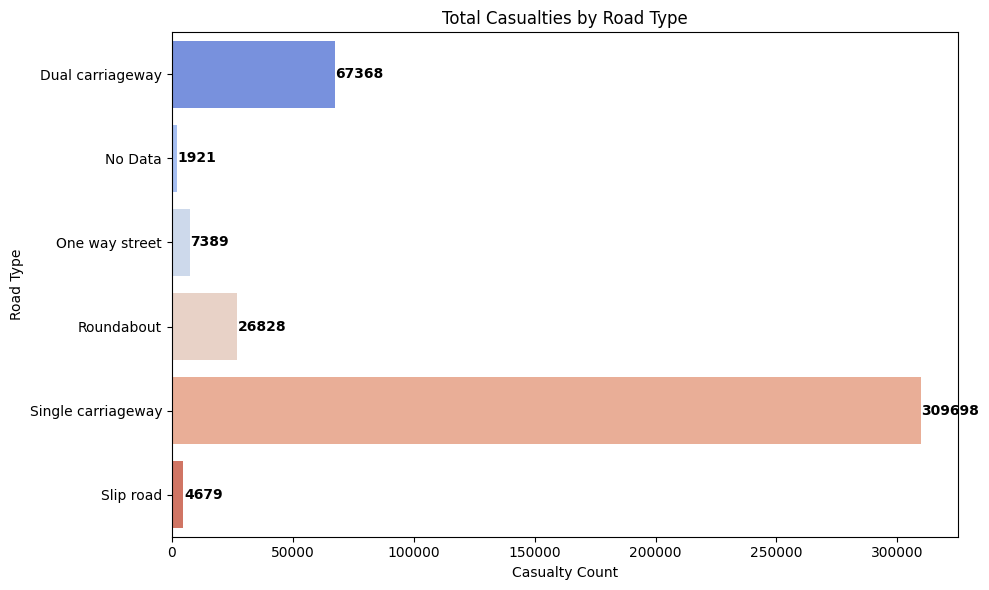

In [44]:

# 4. Total Casualties by Road Type

plt.figure(figsize=(10, 6))  
road_casualties = df.groupby('Road_Type')['Number_of_Casualties'].sum()
bar3 = sns.barplot(
    y=road_casualties.index,
    x=road_casualties.values,
    palette='coolwarm'
)

plt.title('Total Casualties by Road Type')
plt.xlabel('Casualty Count')
plt.ylabel('Road Type')

for i, val in enumerate(road_casualties.values):
    bar3.text(val + 300, i, int(val), va='center', fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\ayush\AppData\Local\Temp\ipykernel_12872\4084656863.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar4 = sns.barplot(


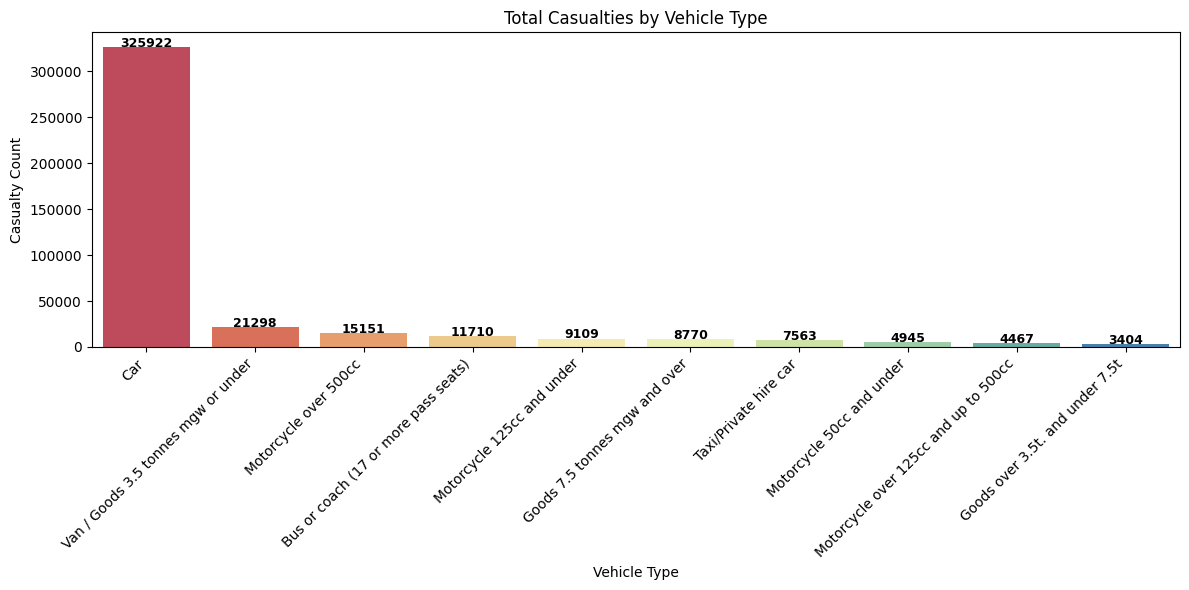

In [45]:
# 5. Total Casualties by Vehicle Type (Updated Colors)

plt.figure(figsize=(12, 6)) 
vehicle_casualties = df.groupby('Vehicle_Type')['Number_of_Casualties'].sum().sort_values(ascending=False).head(10)
bar4 = sns.barplot(
    x=vehicle_casualties.index,
    y=vehicle_casualties.values,
    palette='Spectral'  
)

plt.title('Total Casualties by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Casualty Count')
plt.xticks(rotation=45, ha='right')

for i, val in enumerate(vehicle_casualties.values):
    bar4.text(i, val + 300, int(val), ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


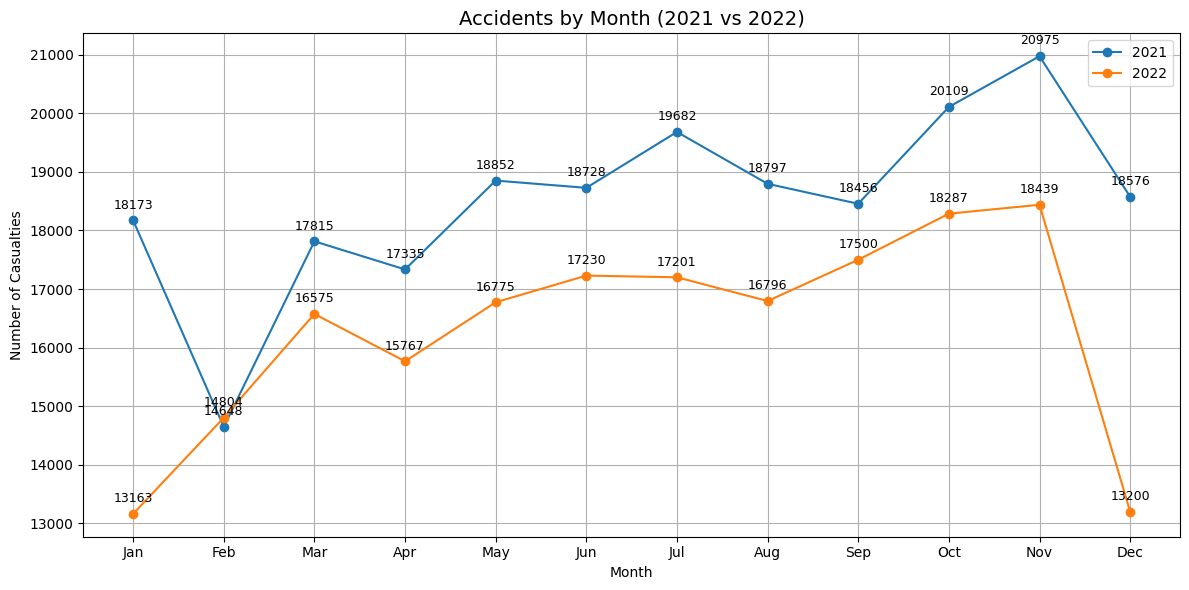

In [46]:

# 6. Monthly Casualties Comparison (2021 vs 2022)

monthly_casualties = df.groupby(['Year', 'Month'])['Number_of_Casualties'].sum().unstack(level=0)
monthly_casualties = monthly_casualties.reindex(range(1, 13), fill_value=0)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
for year in [2021, 2022]:
    if year in monthly_casualties.columns:
        values = monthly_casualties[year]
        plt.plot(month_labels, values, marker='o', label=str(year))
        for i, val in enumerate(values):
            plt.text(i, val + 200, str(int(val)), ha='center', fontsize=9)
plt.title('Accidents by Month (2021 vs 2022)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Casualties')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

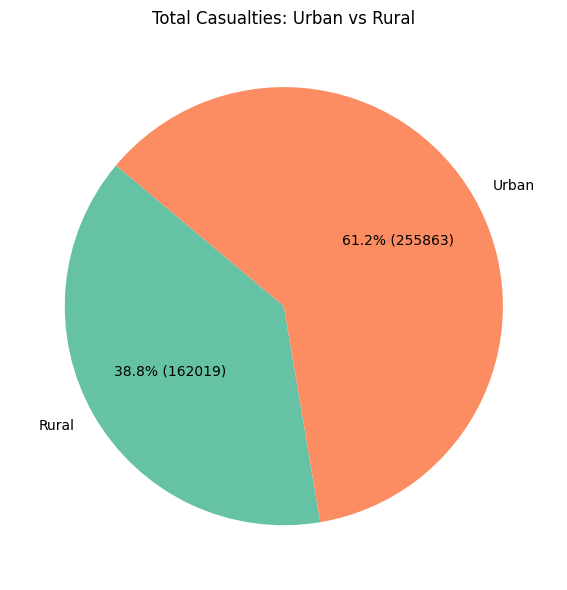

In [47]:
# 7. Urban vs Rural Casualties

plt.figure(figsize=(6, 6))  
urban_rural_casualties = df.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].sum()
plt.pie(
    urban_rural_casualties,
    labels=urban_rural_casualties.index,
    autopct=lambda p: f'{p:.1f}% ({int(p/100.*urban_rural_casualties.sum())})',
    startangle=140,
    colors=sns.color_palette("Set2")
)

plt.title('Total Casualties: Urban vs Rural')
plt.tight_layout()
plt.show()

Lower Outliers in 'Number_of_Casualties':
Empty DataFrame
Columns: [Accident_Index, Number_of_Casualties]
Index: []

Higher Outliers in 'Number_of_Casualties':
       Accident_Index  Number_of_Casualties
1       200901BS70002                    11
5       200901BS70006                     3
8       200901BS70009                     2
22      200901BS70027                     2
24      200901BS70030                     2
...               ...                   ...
307948  201091NL07083                     7
307960  201091NM00770                     2
307962  201091NM00839                     2
307967  201091NM01190                     2
307968  201091NM01760                     2

[72880 rows x 2 columns]


C:\Users\ayush\AppData\Local\Temp\ipykernel_12872\3127556224.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Accident_Severity', y='Number_of_Casualties', data=df, palette='Set2', ax=axes[0, 1])
C:\Users\ayush\AppData\Local\Temp\ipykernel_12872\3127556224.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Light_Grouped', y='Number_of_Casualties', data=df, palette='Set2', ax=axes[1, 0])
C:\Users\ayush\AppData\Local\Temp\ipykernel_12872\3127556224.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Accident Date'].dt.year, 

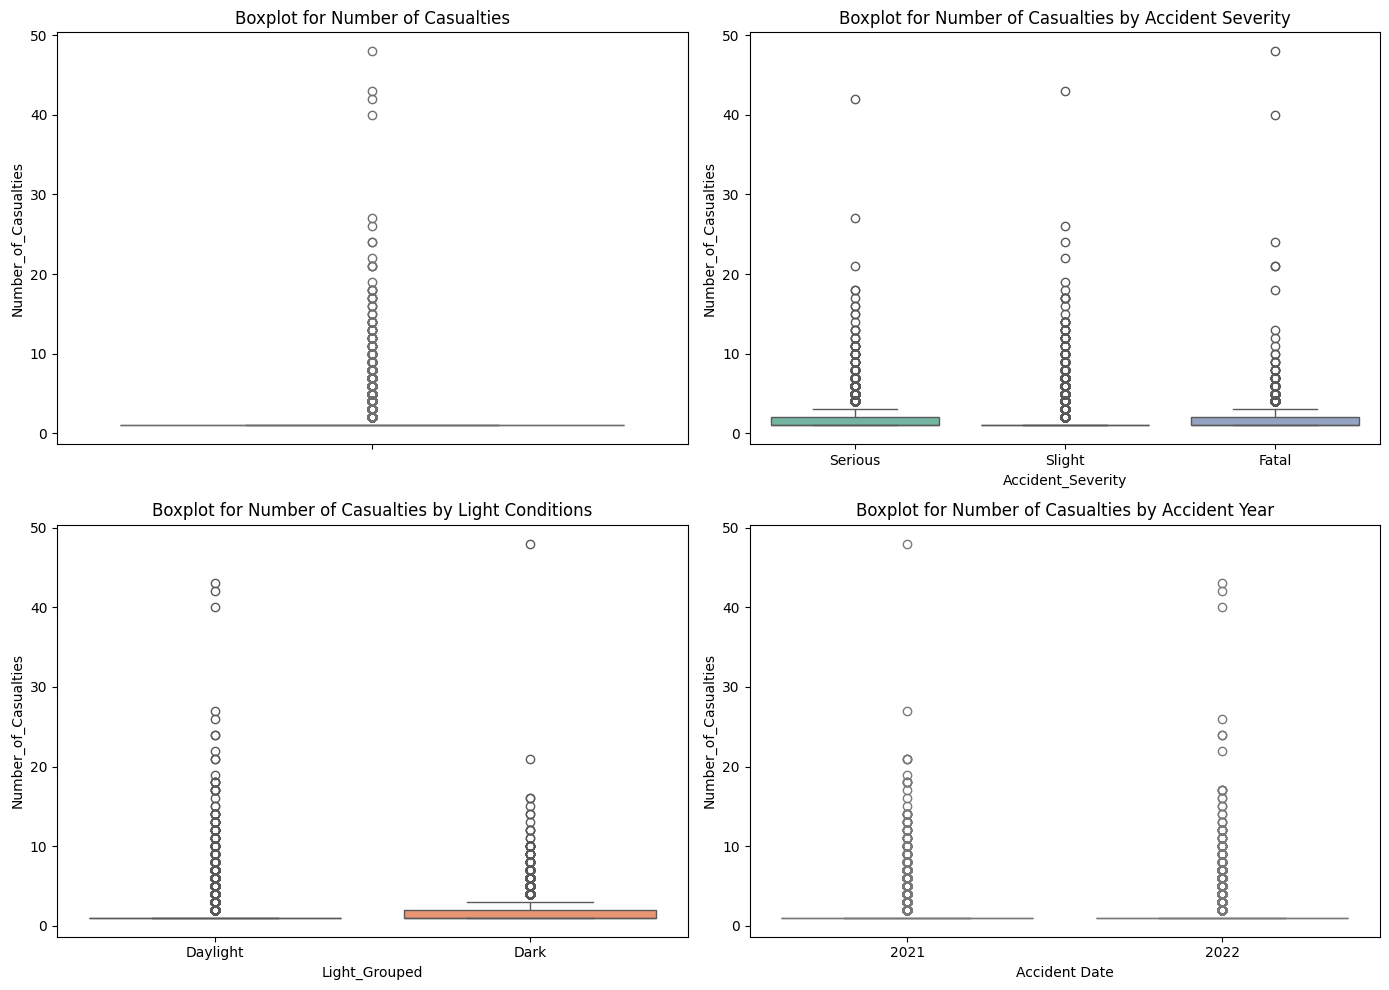

In [48]:

# =======================
# OUTLIERS DETECTION
# =======================

Q1 = df['Number_of_Casualties'].quantile(0.25)
Q3 = df['Number_of_Casualties'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_outliers = df[df['Number_of_Casualties'] < lower_bound]
higher_outliers = df[df['Number_of_Casualties'] > upper_bound]

print("Lower Outliers in 'Number_of_Casualties':")
print(lower_outliers[['Accident_Index', 'Number_of_Casualties']])
print("\nHigher Outliers in 'Number_of_Casualties':")
print(higher_outliers[['Accident_Index', 'Number_of_Casualties']])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot for Number of Casualties
sns.boxplot(y=df['Number_of_Casualties'], color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot for Number of Casualties')

# Boxplot for Accident Severity vs Number of Casualties
sns.boxplot(x='Accident_Severity', y='Number_of_Casualties', data=df, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot for Number of Casualties by Accident Severity')

# Boxplot for Light Conditions vs Number of Casualties
sns.boxplot(x='Light_Grouped', y='Number_of_Casualties', data=df, palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot for Number of Casualties by Light Conditions')

# Boxplot for Accident Date vs Number of Casualties
sns.boxplot(x=df['Accident Date'].dt.year, y=df['Number_of_Casualties'], palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot for Number of Casualties by Accident Year')

plt.tight_layout()
plt.show()
